# **Task 2**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ANZ synthesised transaction dataset.xlsx to ANZ synthesised transaction dataset.xlsx


In [ ]:
import pandas as pd
df =pd.read_excel('/content/ANZ synthesised transaction dataset.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [ ]:
salary_df = pd.DataFrame({"customer_id": df.customer_id.unique()})
salary_df.head()

,customer_id
0,CUS-2487424745
1,CUS-2142601169
2,CUS-1614226872
3,CUS-2688605418
4,CUS-4123612273


In [ ]:
import numpy as np

In [ ]:
df_freq = []
df_amount = []

for customer in range(len(salary_df)):
  salary = df.loc[(df.customer_id == salary_df.customer_id[customer]) & (df.txn_description == "PAY/SALARY"), ["date","amount"]].groupby("date", as_index = False).sum()
  count=len(salary)

  if count == 0:
    df_amount.append(np.nan)
    df_freq.append(np.nan)

  else:
   days_between_payment=[]
   for date in range(len(salary)-1):
     days_between_payment.append((salary.date[date + 1] - salary.date[date]).days)
   df_freq.append(max(days_between_payment))
   df_amount.append(max(salary.amount))

salary_df["salary_freq"]=df_freq
salary_df["salary_amount"]=df_amount
salary_df["annual_salary"]=salary_df["salary_amount"]/salary_df["salary_freq"]*365.25
salary_df.head()

,customer_id,salary_freq,salary_amount,annual_salary
0,CUS-2487424745,7,1013.67,52891.852500
1,CUS-2142601169,7,1002.13,52289.711786
2,CUS-1614226872,7,892.09,46547.981786
3,CUS-2688605418,14,2320.30,60534.969643
4,CUS-4123612273,7,1068.04,55728.801429


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Annual salary distribution')

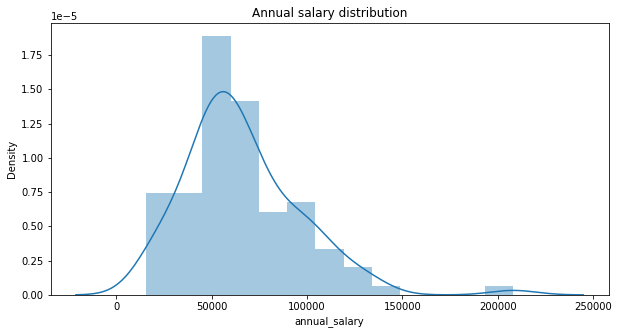

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(salary_df.annual_salary)
plt.title("Annual salary distribution")

In [ ]:
df.corr()

,card_present_flag,merchant_code,balance,age,amount
card_present_flag,1.000000,NaN,0.005925,-0.008405,-0.002074
merchant_code,NaN,NaN,NaN,NaN,NaN
balance,0.005925,NaN,1.000000,0.199329,0.059178
age,-0.008405,NaN,0.199329,1.000000,0.029980
amount,-0.002074,NaN,0.059178,0.029980,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

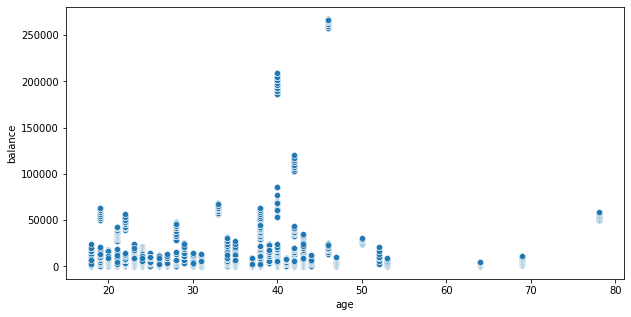

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["age"], y=df["balance"], data=df)

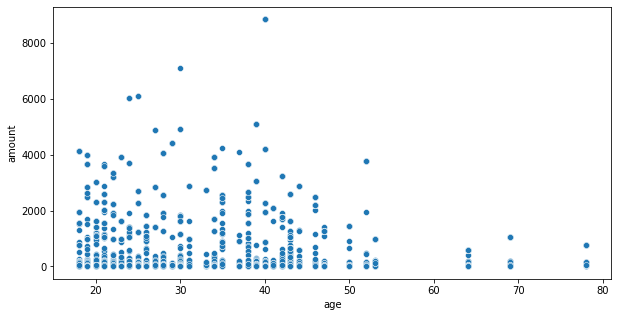

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["age"], y=df["amount"], data=df)

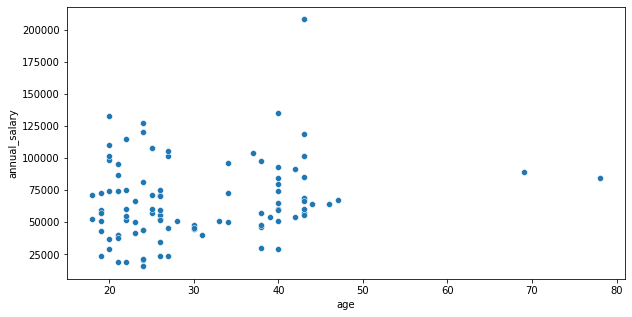

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["age"], y=salary_df["annual_salary"], data=df)

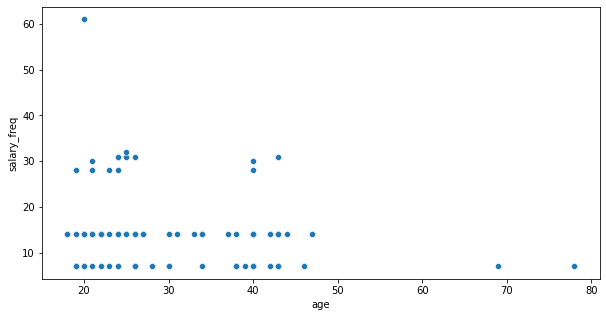

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["age"], y=salary_df["salary_freq"], data=df)

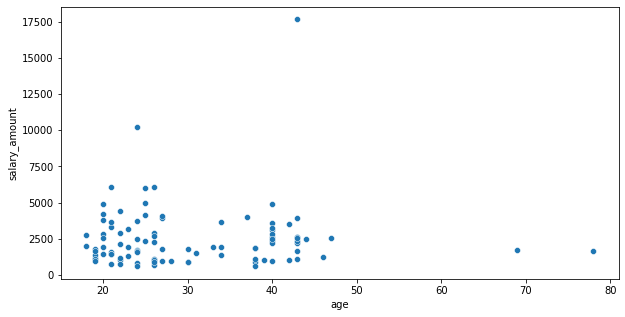

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["age"], y=salary_df["salary_amount"], data=df)

# **Linear Regression Model**

In [ ]:
x = df[["age", "amount"]]
y = df["balance"]

In [ ]:
import sklearn 
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regr = LinearRegression()

In [ ]:
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = regr.predict(X_train)

In [ ]:
pred[0:10]

array([17976.74749543, 23415.45746723, 18584.00584392, 16641.17544792,
       21014.9442088 ,  7231.42367587,  6621.82493457, 16874.37915591,
       17983.63260449,  8412.27681591])